In [9]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [10]:
geolocator = Nominatim(user_agent="rajarcsp")

In [11]:
def get_lat_lang(city):
    location = geolocator.geocode(city)
    return location.latitude, location.longitude

In [18]:
to_lat, to_long = get_lat_lang('Toronto')
mt_lat, mt_long = get_lat_lang('Montreal')
wl_lat, wl_long = get_lat_lang('Waterloo')

In [19]:
df = pd.DataFrame(
    {'City': ['Toronto', 'Montreal', 'Waterloo', ],
     'Country': ['Canada', 'Canada', 'Canada'],
     'Latitude': [to_lat, mt_lat, wl_lat],
     'Longitude': [to_long, mt_long, wl_long]})

In [20]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [21]:
print(gdf.head())

       City Country   Latitude  Longitude  \
0   Toronto  Canada  43.653963 -79.387207   
1  Montreal  Canada  45.497216 -73.610364   
2  Waterloo  Canada  43.466874 -80.524635   

                                geometry  
0           POINT (-79.387207 43.653963)  
1  POINT (-73.61036420000001 45.4972159)  
2           POINT (-80.524635 43.466874)  


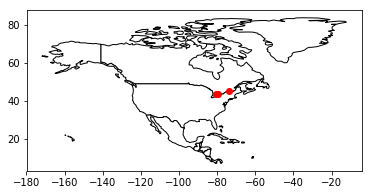

In [23]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

More:

Geopy:
https://geopy.readthedocs.io/en/stable/

Geo pandas:http://geopandas.org/index.html